In [1]:
!python -m pip install cvxpy

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from collections.abc import Callable
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cvxpy as cp

# Unidad II: Optimización con restricciones

### Galicia Pineda Enrique

**Instrucciones**: Resuelva las siguientes acrividdades par alas cuales deberá presentar:

- Los vectores gradietnes calculados en la resolución y las condiciones necesarias para resolver los problemas.

- Los modelos planteados

- Las gráficas que se piden

- Evidencia de los códigos del software utilizado

1. Considere el problema:

$$
\begin{align*}
&\text{max }20x^{2/3}y^{1/3}\\
\text{sujeto a:}&\\
&2x + 17y=2000\\
&(x,y)\in\mathbb{R}^{2}
\end{align*}
$$

a) Formule la condición necesaria para resolver este problema

b) Resuelva haciendo uso de Python, comente sus resultados.

Lo primero que haremos será codificar las función a maximizar y su restricción:

In [3]:
def prob_1 (x, y):
  z = 20 * x ** (2/3) * y ** (1/3)
  return z

def rest (x):
  y = (2000 - 2*x)/17
  return y

Ahora exploraremos la función a maximizar, el conjunto de puntos a donde está restringido, graficando las funciones y comentándolas

La función a maximizar al tener dos potencias fraccionarias (2/3 para la variable x & 1/3 para la variable y) restringe su dominio a todos los puntos donde $(x,y)$ son mayores o iguales a cero, es decir al primer cuadrante del plano cartesiano:

$$
Dom(f)=\{(x,y)\mathbb{R}^{2}: x\geq0,~y\geq 0\}
$$

Luego como $x^{2/3}\geq 0$ y $y^{1/3}\geq 0$ la función $20x^{2/3}y^{1/3}\geq 0$, es decir:

$$
\text{Rango}(f) = \{z\in\mathbb{R}:z\geq 0\}
$$

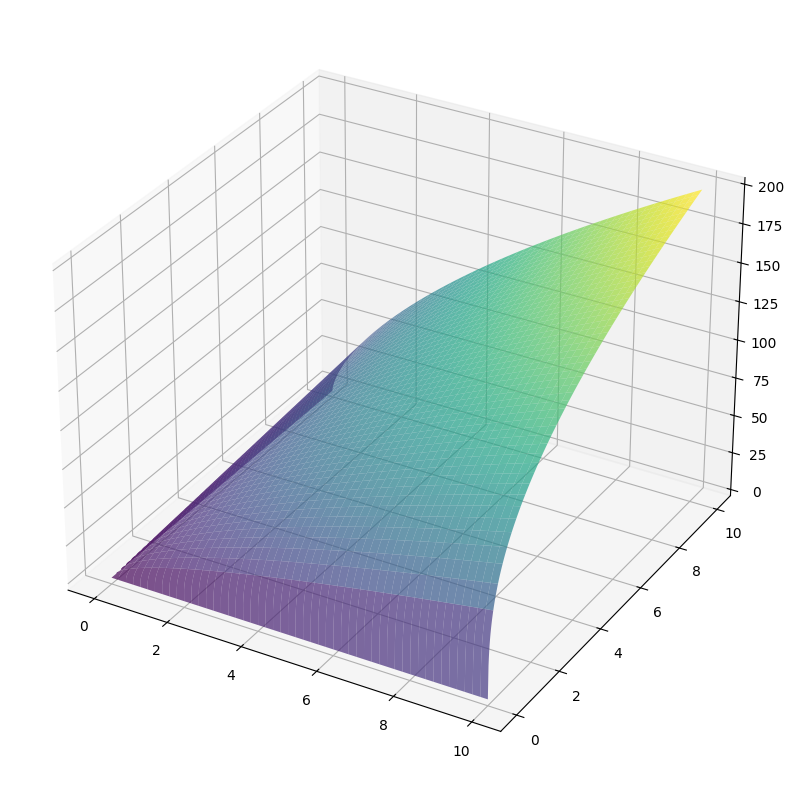

In [4]:
x_lims = (0,10)
y_lims = (0,10)
mesh_size = 800
f = prob_1
x_axis = np.linspace(x_lims[0], x_lims[1], mesh_size)
y_axis = np.linspace(y_lims[0], y_lims[1], mesh_size)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
f_x = np.zeros((mesh_size, mesh_size))
for i in range(mesh_size):
 for j in range(mesh_size):
 # compute f(x) for every cell in the mesh
   f_x[i, j] = f(x_mesh[i, j], y_mesh[i, j])
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh,
y_mesh,
f_x,
cmap='viridis',
edgecolor='none',
alpha=0.7)

Apoyados con la gráfica, podemos ver que efectivamente la función está acotada inferiormente por el valor $z=0$, el comportamiento de la función es creciente, conforme crecen los valores de $x, y$. La función tiene su mínimo global cuando $x=0$ ó cuando $y=0$ pues ahí $f((x,y))= 0$.

Es importante hacer notar que **esta función es no lineal** por los exponentes fraccionarios de $x, y$ y el producto entre ellos $x^{2/3}y^{1/3}$, esta característica de la función a maximizar ya restringe algunos métodos de optimización a los que podamos recurrir para resolver el problema de maximización.

Si ahora analizamos la restricción, vemos que los posibles valores de $(x,y)$ a donde se restringe la función, **deben satisfacer una igualdad**

$$
2x + 17y = 2000
$$

Aún más, **la restricción es lineal** pues tanto $x$ como $y$ en la restricción son lineales (no están afectados por ninguna potencia) por lo que podemos decir que el conjunto de puntos que satisfacen esta igualdad en $\mathbb{R}^{2}$ forman una recta:

Text(0.5, 1.0, 'Restricción: $2x + 17y=2000$')

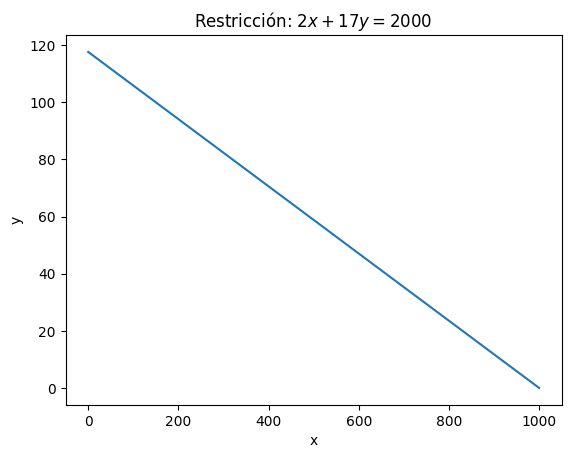

In [5]:
x=np.linspace(0, 1000, 500)
rest = lambda x: (2000 - 2*x)/17
plt.plot(x, rest(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Restricción: $2x + 17y=2000$")

Con toda esta información, podemos graficar ahora la función

$$
f((x,y)) = 20x^{2/3}y^{1/3}
$$

Podemos graficar en el plano $(x,y)$ la restricción:

$$
2x + 17y=2000
$$

y podemos también calcular ahora el valor de la función $f(x,y)$ sobre la restricción, esto lo logramos con el siguiente código de python:

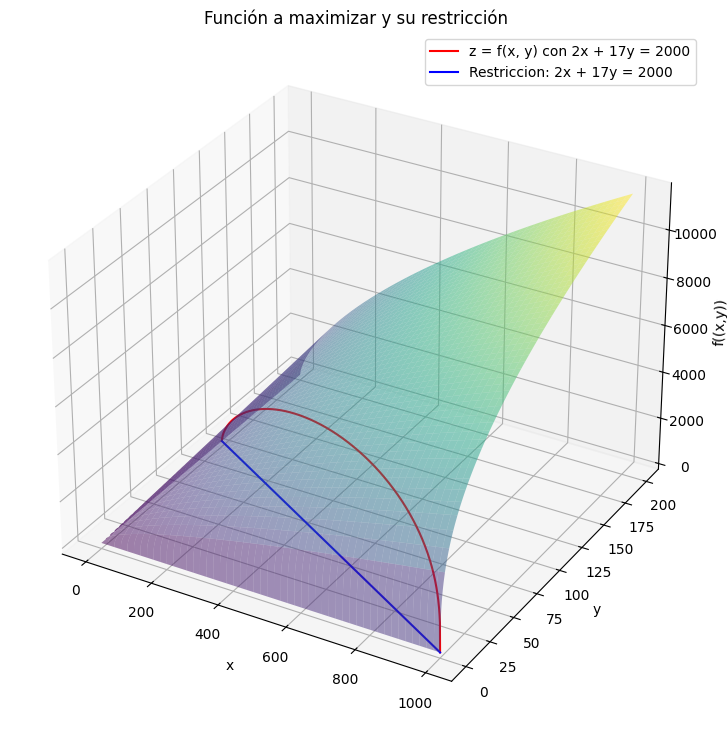

In [6]:
f = prob_1
mesh_size = 500
# plot f(x)
x_surf = np.linspace(0, 1000, mesh_size)
y_surf = np.linspace(0, 200, mesh_size)
X, Y = np.meshgrid(x_surf, y_surf)
Z = f(X, Y)
# plot f(x) restriccion
x = np.linspace(0, 1000, mesh_size)
y = rest(x)
z = f(x, y)
# plot restriccion
z_0 = np.zeros(z.shape)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Graficar la curva de restricción
ax.plot(x, y, z, color='r', label='z = f(x, y) con 2x + 17y = 2000')
# Graficar la restricción
ax.plot(x, y, z_0, color='b', label='Restriccion: 2x + 17y = 2000')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f((x,y))')

# Mostrar la gráfica
plt.title("Función a maximizar y su restricción")
plt.legend()
plt.show()

En azul se muestra la recta con la restricción $2x+17y=2000$ que es el conjunto donde buscaremos maximizar la función, en rojo se muestra el valor de la función $f((x,y))$ cuando recorremos dicha restricción, que es donde buscaremos el máximo de la función.


De este primer análisis sabemos que:

1. Es un problema de maximización

2. La función es no lineal

3. La restricción es lineal y debe satisfacerse una igualdad

**Como es una función no lineal y es el caso en el que solo existen restricciones de igualdad podemos utilizar el método de los Multiplicadores de Lagrange**

Podemos verificar si el problema satisface las condiciones necesarias para resolverse por el Método de Multiplicadores de Lagrange que son:

- f y la restricción deben tener primeras derivadas parciales continuas

- El gradiente de la restricción debe ser distinto de cero

Veamos que las derivadas parciales:


$$
\partial_x f((x,y)) = \frac{40}{3}x^{-1/3}y^{1/3}
$$

Es continua cuando $x\neq 0$, pues en ese punto se indetermina la derivada parcial, siendo su dominio $\{(x,y)\in\mathbb{R}^{2}:x>0, y\geq 0\}$

La otra derivada parcial:

$$
\partial_y f((x,y)) = \frac{20}{3}x^{2/3}y^{-2/3}
$$

También es continua cuando $y\neq 0$, pues en este punto se indetermina la derivada parcial, siendo su dominio $\{(x,y)\in\mathbb{R}^{2}:x\geq0, y> 0\}$.

Para la restricción, calculemos directamente el gradiente de

$$
res(x,y) = 2x + 17y - 2000.
$$

$$
\nabla res(x,y) = (\partial_x res, \partial_y res) = (2, 17)
$$

Así, podemos ver rápidamente que las derivadas parciales son funciones continuas pues son funciones constantes y que el grediente de la restricción es distinto de cero para todo $(x,y)$.

Entonces se cumplen las condiciones para aplicar el método de los multiplicadores de Lagrange y encontrar la solución al problema de maximización:

In [7]:
##Encuentra el valor máximo
fun = lambda x : -20 * x[0] ** (2/3) * x[1] ** (1/3)
cons = ({'type': 'eq',
         'fun': lambda x: 2 * x[0]+ 17 * x[1] - 2000})
x0 = np.array((0, 0)) # Establecer valor inicial
res = minimize(fun, x0, method='SLSQP', constraints=cons)

print('Valor máximo:', np.round(-res.fun,4))
print('Solución óptima:',np.round(res.x,4))
print('Motivo de paro:', res.message)

Valor máximo: 5185.4816
Solución óptima: [666.6633  39.2161]
Motivo de paro: Optimization terminated successfully


Lo que hicimos fue utilizar el módulo `scipy.optimize.minimize` que se encarga de resolver problemas de minimización por diferentes métodos. Para resolver el problema de maximización, multiplicamos por $-1$ la función a maximizar, convirtiendo así el problema en su análogo de minimización, es decir, ahora la función a resolver se ve así:

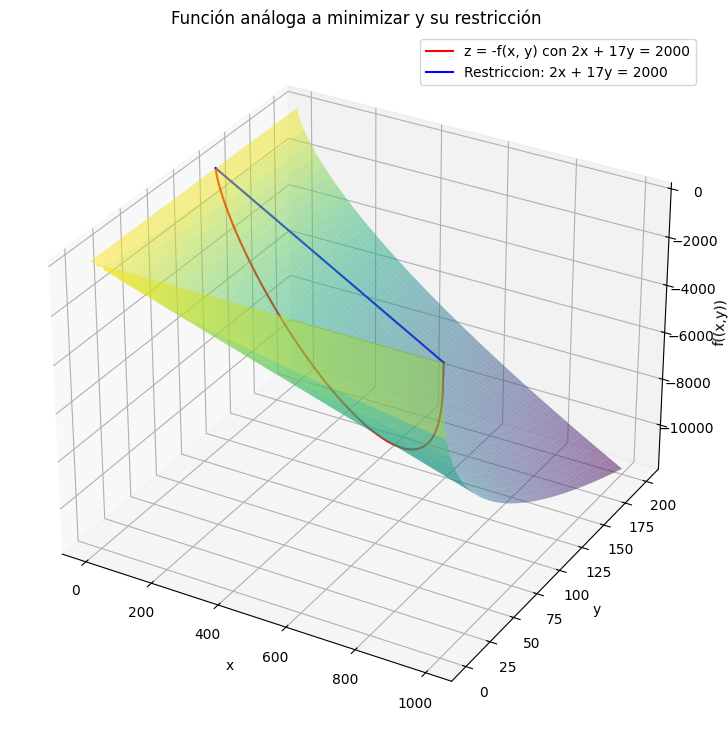

In [8]:
f = prob_1
mesh_size = 500
# plot f(x)
x_surf = np.linspace(0, 1000, mesh_size)
y_surf = np.linspace(0, 200, mesh_size)
X, Y = np.meshgrid(x_surf, y_surf)
Z = -1 * f(X, Y)
# plot f(x) restriccion
x = np.linspace(0, 1000, mesh_size)
y = rest(x)
z = -1 * f(x, y)
# plot restriccion
z_0 = np.zeros(z.shape)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Graficar la curva de restricción
ax.plot(x, y, z, color='r', label='z = -f(x, y) con 2x + 17y = 2000')
# Graficar la restricción
ax.plot(x, y, z_0, color='b', label='Restriccion: 2x + 17y = 2000')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f((x,y))')

# Mostrar la gráfica
plt.title("Función análoga a minimizar y su restricción")
plt.legend()
plt.show()

Y el punto donde se minimice la función análoga, será el punto donde se maximice la función original, que fue en $(666.6633, 39.2161)$ donde la función vale $5185.4816$. Podemos graficar este punto ya en nuestro problema original:

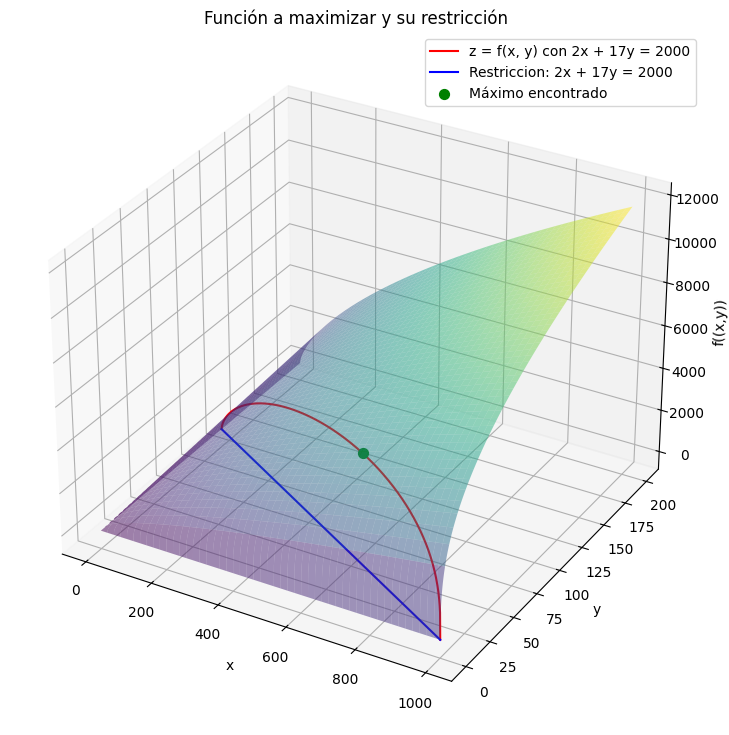

In [9]:
f = prob_1
mesh_size = 500
# plot f(x)
x_surf = np.linspace(0, 1000, mesh_size)
y_surf = np.linspace(0, 200, mesh_size)
X, Y = np.meshgrid(x_surf, y_surf)
Z = f(X, Y)
# plot f(x) restriccion
x = np.linspace(0, 1000, mesh_size)
y = rest(x)
z = f(x, y)
# plot restriccion
z_0 = np.zeros(z.shape)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Graficar la curva de restricción
ax.plot(x, y, z, color='r', label='z = f(x, y) con 2x + 17y = 2000')
# Graficar la restricción
ax.plot(x, y, z_0, color='b', label='Restriccion: 2x + 17y = 2000')
# Graficar punto máximo
ax.scatter(666.6633, 39.2161, 5185.4816, color='green', marker='o', s=50, label="Máximo encontrado")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f((x,y))')

# Mostrar la gráfica
plt.title("Función a maximizar y su restricción")
plt.legend()
plt.show()

2. Considere el problema:

$$
\begin{align*}
\text{Opt: }&x^2 + y^2 + y -1\\
\text{sujeto a: }&\\
&x^{2} + y^{2}\leq 1\\
&(x,y)\in\mathbb{R}^{2}
\end{align*}
$$

a) Formule las condiciones necesarias para obtener los puntos máximos y mínimos respectivamente

b) Obtenga el máximo y el mínimo de este problema haciendo uso de Python, comente sus resultados

Codificando la función a optimizar y su restricción:

In [10]:
def prob_2 (x,y):
  z = x **2 + y ** 2 + y -1
  return z

def rest (x):
  y = np.sqrt(1-x**2)
  return y

Exploraremos la función a optimizar, para ver cómo se comporta y comenzar a analizar dónde podrían estar su mínimo y máximo

La función a maximizar tiene dos términos cuadráticos, uno para $x$ y otro para $y$, también tiene un término lineal en $y$ y una constante $-1$. Estos términos lineales en la función nos restringen ya los algoritmos de optimización que podemos utilizar.

Ademas con esta información, como los términos cuadráticos tiene el mismo signo, sabemos que la función es un paraboloide elíptico y que podemos reescribir como:

$$
x^2 + y(y+1) -1
$$

Así podemos saber que su mínimo lo alcanza cuando $x=0$ y para poder conocer el punto en $y$:

$$
y(y+1)-1=-5/4
$$
Cuando $y=-1/2$ y ese es el mínimo de la función. Además, al ser un paraboloide sabemos que el dominio de la función es

$$
Dom(f)=\mathbb{R}^{2}
$$

Mientras que su rango, una vez calculado el mínimo:

$$
Rango(f)=\{z\in\mathbb{R}: z\geq -1.25\}
$$

Graficándola a continuación:

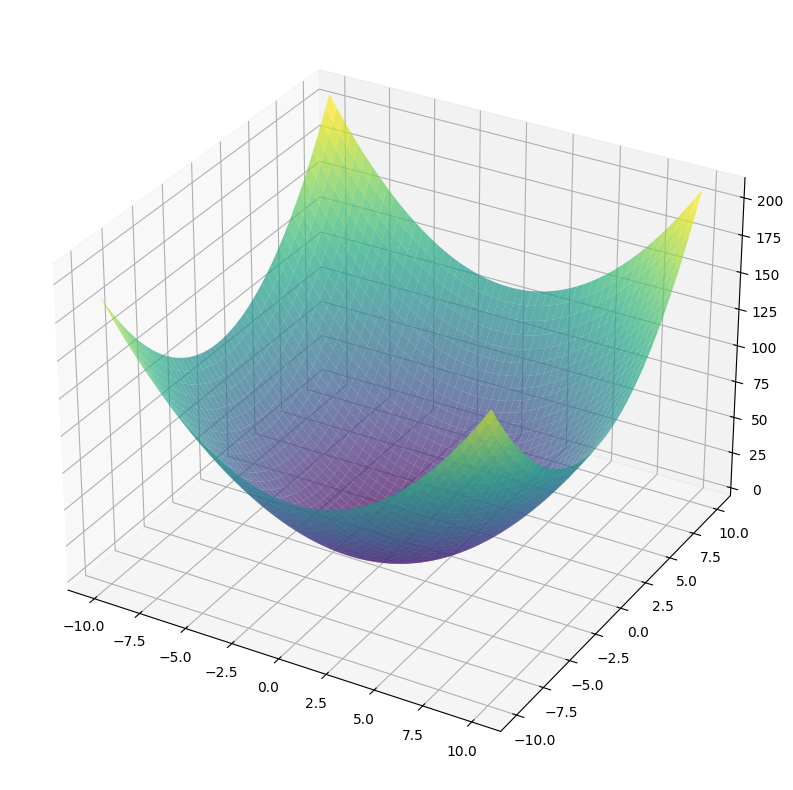

In [11]:
x_lims = (-10,10)
y_lims = (-10,10)
mesh_size = 900
f = prob_2
x_axis = np.linspace(x_lims[0], x_lims[1], mesh_size)
y_axis = np.linspace(y_lims[0], y_lims[1], mesh_size)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
f_x = np.zeros((mesh_size, mesh_size))
for i in range(mesh_size):
 for j in range(mesh_size):
 # compute f(x) for every cell in the mesh
   f_x[i, j] = f(x_mesh[i, j], y_mesh[i, j])
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh,
y_mesh,
f_x,
cmap='viridis',
edgecolor='none',
alpha=0.7)

Apoyados con la gráfica, podemos confirmar que la función es un paraboloide y que que efectivamente la función está acotada inferiormente por el valor $z=-1$, y el comportamiento de la función es creciente, conforme crecen los valores de $x, y$ a lo largo de todo el plano $\mathbb{R}^{2}$. La función tiene su mínimo global cuando $(x,y) = (0,0)$, mientras que no tiene un máximo global, pues la función no está acotada. Falta ver su comportamiento cuando la función se le impone la restricción.

Si ahora analizamos la restricción, vemos que los posibles valores de $(x,y)$ a donde se restringe la función, **deben satisfacer una desigualdad**

$$
x^2 + y^2 \leq 1
$$

Aún más, **la restricción es no lineal**
y los puntos de la restricción son todos aquellos que pertenecen a la circunferencia unitaria ó que están en el interior de dicha circunferencia en $R^{2}$. Si graficamos estos puntos, efectivamente coloreamos la circunferencia unitaria y su interior:

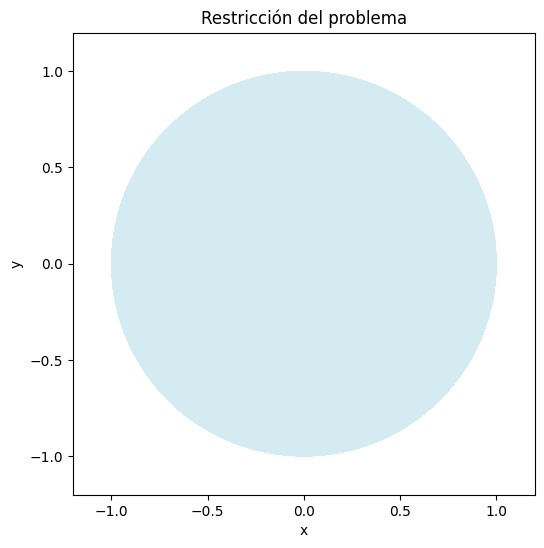

In [12]:
x = np.linspace(-1.2, 1.2, 500)
y = np.linspace(-1.2, 1.2, 500)
X, Y = np.meshgrid(x, y)
# Restricción
Z = X**2 + Y**2

# Graficar la restriccion (x^2 + y^2 <= 1)
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, Z, levels=[0, 1], colors='lightblue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

# Título
plt.title('Restricción del problema')

# Mostrar la gráfica
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Con toda esta información, podemos graficar ahora la función

$$
f((x,y)) = x^2 + y^2 + y -1
$$

y también podemos graficar en el plano $(x,y)$ la restricción:

$$
x^2 + y^2 \leq 1
$$

esto lo logramos con el siguiente código de python:

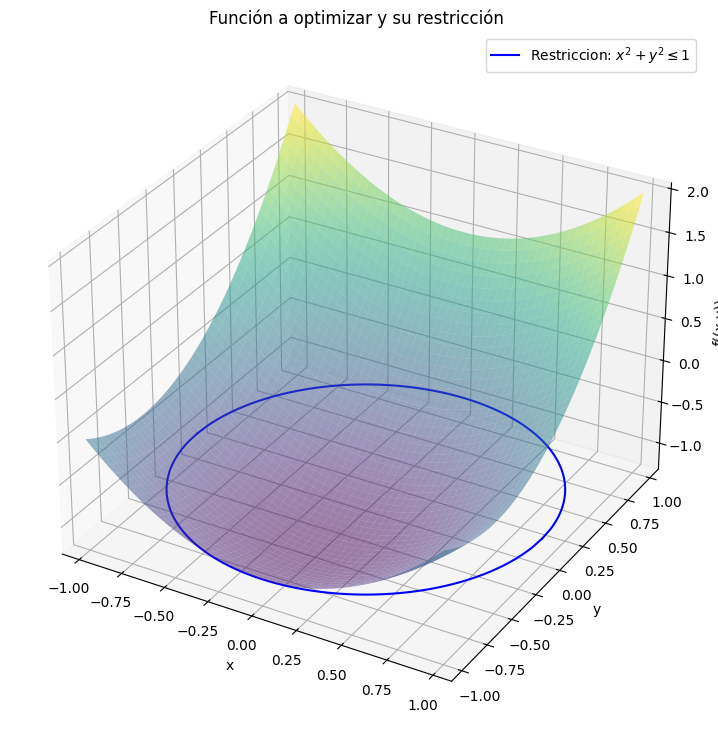

In [13]:
f = prob_2
mesh_size = 500
# plot f(x)
x_surf = np.linspace(-1, 1, mesh_size)
y_surf = np.linspace(-1, 1, mesh_size)
X, Y = np.meshgrid(x_surf, y_surf)
Z = f(X, Y)
# plot f(x) restriccion
x = np.linspace(-1, 1, mesh_size)
y = rest(x)
z = f(x, y)
# plot restriccion
z_0 = np.zeros(z.shape) -1

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Graficar la restricción
ax.plot(x, y, z_0, color='b', label=r"Restriccion: $x^2 + y^2 \leq 1$")
ax.plot(x, -y, z_0, color='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f((x,y))')

ax.axes.set_xlim3d(left=-1.1, right=1.1)
ax.axes.set_ylim3d(bottom=-1.1, top=1.1)

# Mostrar la gráfica
plt.title("Función a optimizar y su restricción")
plt.legend()
plt.show()

En azul en 2D se muestra la restricción $x^2 + y^2\leq 1$ que es el conjunto donde buscaremos optimizar la función, en la gráfica también se muestras los valores que toma la función $f((x,y))=x^2+ y^2+y-1$ dentro de la restricción.

De este primer análisis sabemos que:

1. Es un problema de maximización y minimización

2. La función es no lineal

3. La restricción es no lineal y debe satisfacerse una desigualdad

**Como es una función no lineal y es el caso en el que existen restricciones de desigualdad podemos utilizar las condiciones de Karush-Kuhn-Tucker**

Podemos verificar si el problema satisface las condiciones necesarias para resolverse por el Método KKT que son:

- f y la restricción deben tener primeras derivadas parciales continuas

- $f$ debe tener un valor óptimo en la restricción

Veamos que las derivadas parciales:


$$
\partial_x f((x,y)) = 2x
$$

Es continua cuando para todo $x$

La otra derivada parcial:

$$
\partial_y f((x,y)) = 2y + 1
$$

También es continua para todo $y$.

Para la restricción, calculemos las derivadas parciales de

$$
res(x,y) = x^2 y^2 - 1.
$$

$$
\partial_x res = 2x
$$

$$
\partial_y res = 2y
$$

Así, podemos ver rápidamente que las derivadas parciales son funciones continuas.

Finalmente, del primer análisis que realizamos, notamos que la función tiene su mínimo en $-1.25$ y que lo alcanza cuando $(x,y)=(0,-1/2)$, y este es un punto que se alcanza dentro de la restricción.

Por otro lado, para el máximo, también hay que notar que la función es creciente, algo que mencionamos al principio, conforme $(x,y)$ se expanden a lo largo de todo el plano $\mathbb{R}^{2}$, esto quiere decir que el máximo se alcanzará en la frontera de la restricción, es decir, el máximo estará en algún punto $(x,y) :  x^2+y^2=1$ que son puntos que pertenecen a la restricción.

Entonces se cumplen las condiciones para aplicar el método de KKT y encontrar la solución al problema de optimización:

In [14]:
## Encuentra el valor mínimo

fun = lambda x : x[0]**2 + x[1]**2 + x[1] - 1 # f(x,y) =x^2+y^2+y-1
cons = ({'type': 'ineq',
         'fun': lambda x: 1 - x[0]**2 - x[1]**2}, # x^2 + y^2 <=1
       )
x0 = np.array((0, 0)) # Establecer valor inicial
res = minimize(fun, x0, method='SLSQP', constraints=cons)

print('Valor mínimo:',np.round(res.fun,4))
print('Solución óptima:',np.round(res.x,4))
print('Motivo de paro:', res.message)

Valor mínimo: -1.25
Solución óptima: [-0.  -0.5]
Motivo de paro: Optimization terminated successfully


In [15]:
fun = lambda x : -x[0]**2 - x[1]**2 - x[1] + 1 # -f(x,y) =-x^2-y^2-y+1
cons = ({'type': 'ineq',
         'fun': lambda x: 1 - x[0]**2 - x[1]**2}, # x^2 + y^2 <=1
       )
x0 = np.array((0, 0)) # Establecer valor inicial
res = minimize(fun, x0, method='SLSQP', constraints=cons)

print('Valor máximo:', np.round(-res.fun,4))
print('Solución óptima:',np.round(res.x,4))
print('Motivo de paro:', res.message)

Valor máximo: 1.0
Solución óptima: [0. 1.]
Motivo de paro: Optimization terminated successfully


Hemos encontrado tanto el máximo como el mínimo de la función a optimizar y en ambos casos el código en python terminó exitosamente. Para el caso del problema de minimización se encontró el valor analizado al principio del problema, es decir se encontró el punto $(0,-1/2)$ donde la función vale $-5/4$, valor mínimo de la función.

Por otro lado para el problema de maximización, fue necesario repetir el proceso realizado en el problema 1, donde se definió una función análoga

$$
-x^2 + y^2 -y +1
$$

Para resolver otro problema de minimización, y el punto encontrado será un máximo de nuestra función original. Notemos que este punto se encuentre en la circunferencia como habíamos mencionado, pues es el punto $(x,y) = (0,1)$ alcanzando el valor máximo de 1.

Si graficamos los puntos encontrados:

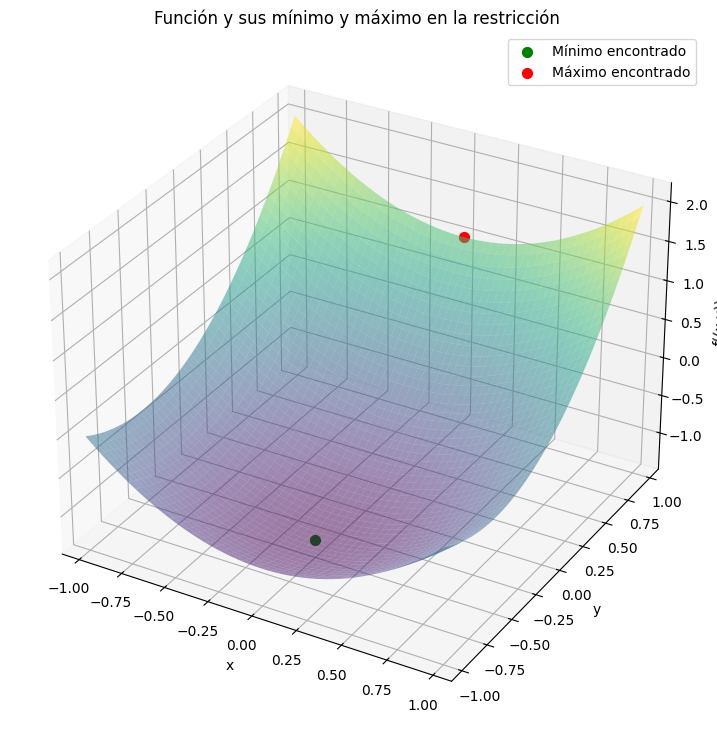

In [16]:
f = prob_2
mesh_size = 500
# plot f(x)
x_surf = np.linspace(-1, 1, mesh_size)
y_surf = np.linspace(-1, 1, mesh_size)
X, Y = np.meshgrid(x_surf, y_surf)
Z = f(X, Y)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Graficar máximos y mínimos
# Graficar punto máximo
ax.scatter(0, -0.5, -1.25, color='green', marker='o', s=50, label="Mínimo encontrado")
ax.scatter(0, 1, 1, color='red', marker='o', s=50, label="Máximo encontrado")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f((x,y))')

ax.axes.set_xlim3d(left=-1.1, right=1.1)
ax.axes.set_ylim3d(bottom=-1.1, top=1.1)

# Mostrar la gráfica
plt.title("Función y sus mínimo y máximo en la restricción")
plt.legend()
plt.show()

3. Considere el siguiente modelo de programación lineal

$$
\begin{align*}
\text{max: }&25x + 20y\\
\text{sujeto a: }&\\
x&\leq20\\
y&\leq30\\
x-y&\leq0\\
y-2x&\leq0\\
x&\geq0\\
y&\geq0
\end{align*}
$$

a) Resuelva mediante el método gráfico, puede hacer uso de las herramientas computacionales de su preferencia. Comente sus soluciones.

In [17]:
x = np.linspace(-30, 30, 1000)
y = np.linspace(-30, 30, 1000)

# Crear una malla de puntos
X, Y = np.meshgrid(x, y)

In [18]:
def plot_reg(region, title : str, plot_fun = False):
  # Graficar
  plt.figure(figsize=(8, 8))
  plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Blues", alpha=0.3)
  if plot_fun:
    for i in [5, 7, 9, 11]:
      plt.plot(x, (i*100 - 25*x)/20, label=f"Curva de nivel 25x+20y={i*100}")
      plt.xlim(0,30)
      plt.ylim(0,33)
      plt.legend()

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.grid(True)
  plt.show()

In [19]:
# restricción 1
r1 = (X <= 20)
# restricción 2
r2 = (Y <= 30)
# restriccion 3
r3 = (X - Y <= 0)
# restriccion 4
r4 = (Y - 2*X <= 0)
# restriccion 5
r5 = (X >= 0)
# restriccion 5
r6 = (Y >= 0)

Lo primero que hemos definido es el espacio de búsqueda, que en este caso hemos comenzado con una malla $(x,y)$ en el subconjunto de $\mathbb{R}^{2}$: $\{(x,y)\in\mathbb{R}^{2}:|x|\leq30, |y|\leq 30\}$ y la hemos _wrappeado_ dentro de una función para poder llamarla las veces que sea necesaria y graficar diferentes restricciones.

Comenzaremos con este espacio e iremos acotando las regiones hasta encontrar la región factible por el método gráfico.

Para esto aprovecharemos las funciones de matplotlib y además escribiremos cada una de las restricciones a satisfacer dentro de la malla, para poder graficarlas

Comencemos con las restricciones directas sobre $x$:

$$
x\leq20, x\geq0
$$
Con estas dos restricciones la región factible se ve como:

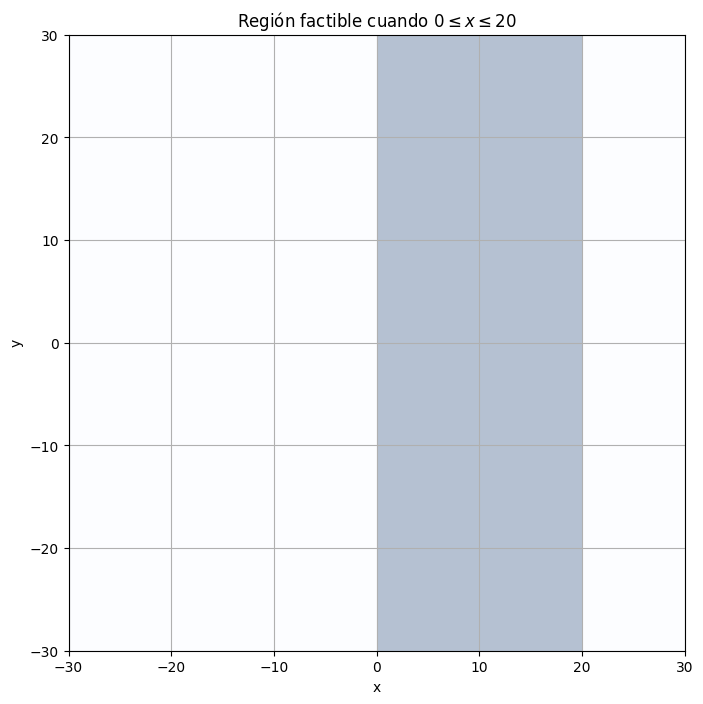

In [20]:
plot_reg(r1 & r5, r"Región factible cuando $0\leq x\leq 20$")

Como esperábamos, con estas primeras restricciones, el espacio se restringe a los dos cuadrantes derechos del espacio cartesiano, donde $x$ es positivo y se acota por $x=20$. Continuemos ahora por agregar las restricciones de $y$:

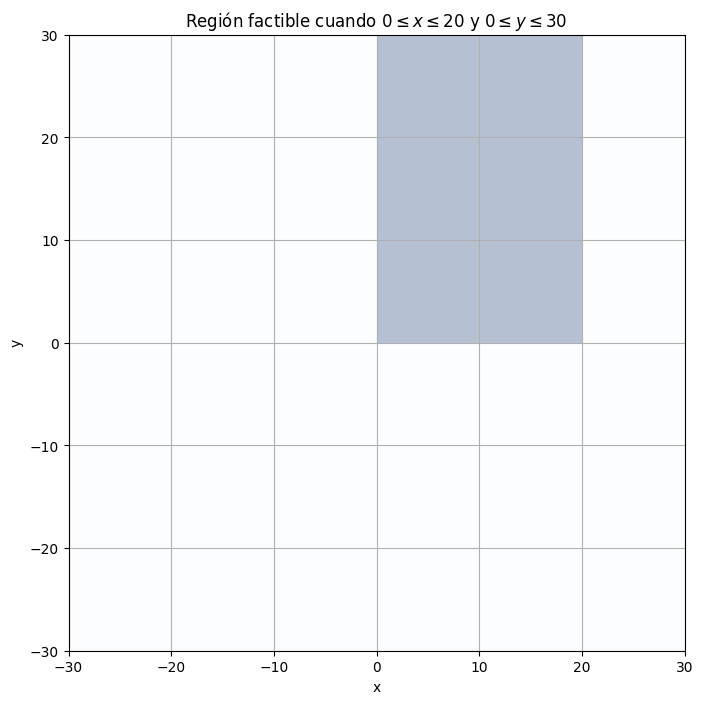

In [21]:
plot_reg(r1 & r2 & r5 & r6, r"Región factible cuando $0\leq x\leq 20$ y $0\leq y\leq 30$")

Ya con cuatro de las 6 restricciones, la región factible se ha acotado al primer cuadrante del plano cartesiano, acotado por $x=20$ y $y=30$

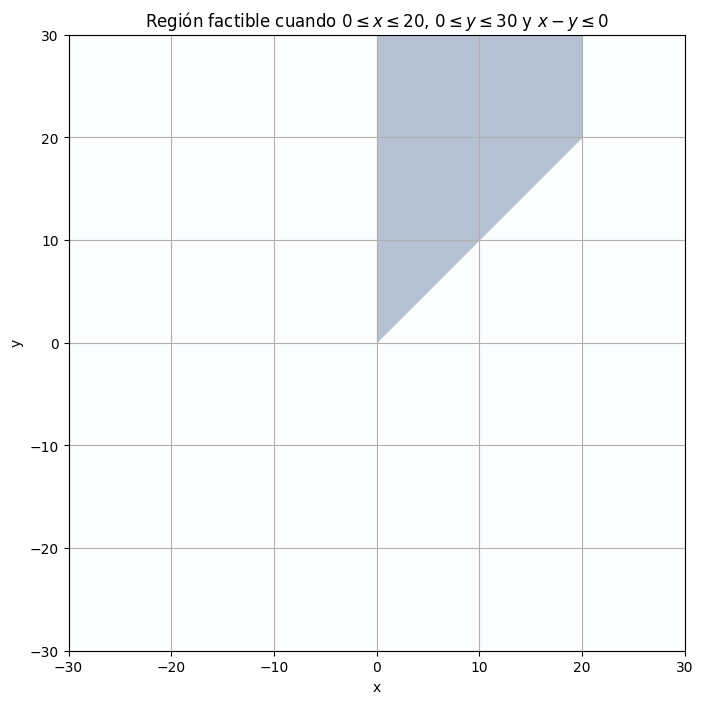

In [22]:
plot_reg(r1 & r2 & r3 & r5 & r6, r"Región factible cuando $0\leq x\leq 20$, $0\leq y\leq 30$ y $x-y\leq 0$")

Agregando la restricción $x-y\leq 0$ quitamos a todos los puntos por debajo de la identidad pues

$$
\begin{align*}
&x-y\leq 0\\
\implies&x\leq y
\end{align*}
$$

Agregando la última restricción del problema encontramos nuetra región factible:



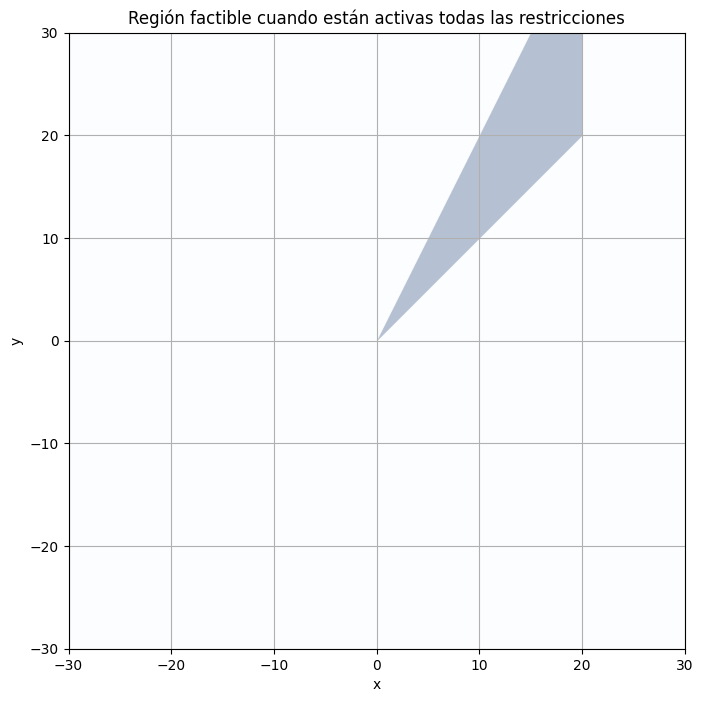

In [23]:
plot_reg(r1 & r2 & r3 & r4 & r5 & r6, r"Región factible cuando están activas todas las restricciones")

Donde la última restricción ha eliminado a todas las $y$ por encima de la recta $y=2x$ pues
$$
\begin{align*}
&y-2x\leq0\\
\implies&y\leq 2x
\end{align*}
$$

De esta forma hemos encontrado nuestra región factible

Por último para solucionar el problema, debemos buscar el vértice y eso lo lograremos graficando el problema a optimizar sobre la región factible:

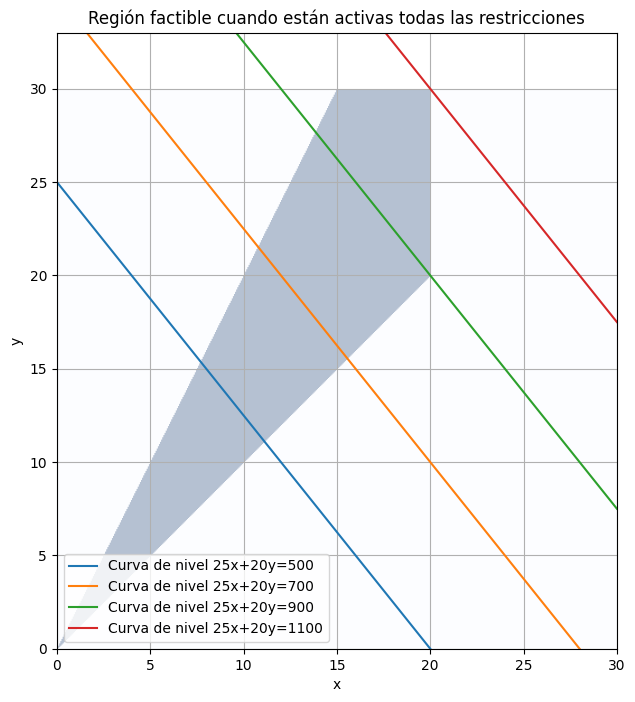

In [24]:
plot_reg(r1 & r2 & r3 & r4 & r5 & r6, r"Región factible cuando están activas todas las restricciones", True)

Con el método gráfico podemos notar cómo el vértice solución es el que está en $(20,30)$ y en ese lugar el valor de la función es

$$
f(x=20,~y=30) = 25x + 20y = 1100
$$

De esta forma por el método gráfico la solución es:

$$
\boxed{x=20, y=30, f(x,y)=1100 \text{ es máximo en la región factible}}
$$

**b) Utilice las paqueterías de Python presentadas durante el curso para resolver y corroborar los resultados obtenidos en el inciso anterior. Comente sus soluciones**

Para poder corroborar el resultado, utilizaremos el paquete `cvxpy`

In [25]:
x = cp.Variable(shape=(2,1), name="x")


objective = cp.Maximize(25 * x[0] + 20 * x[1])

constraints = [x[0] <= 20,
               x[1] <= 30,
               x[0] - x[1] <= 0,
               x[1] - 2*x[0] <= 0,
               x[1] >= 0,
               x[0] >= 0]

problem = cp.Problem(objective, constraints)

solution = problem.solve()
print('Valor Máximo: ', np.round(solution,4))
print('Solución: ', np.round(x.value,4))
print('Valor dual de la primer restricción: ', np.round(problem.constraints[0].dual_value,4))
print('Valor dual de la segunda restricción: ', np.round(problem.constraints[1].dual_value,4))
print('Valor dual de la tercer restricción: ', np.round(problem.constraints[2].dual_value,4))
print('Valor dual de la cuarta restricción: ', np.round(problem.constraints[3].dual_value,4))
print('Valor dual de la quinta restricción: ', np.round(problem.constraints[4].dual_value,4))
print('Valor dual de la sexta restricción: ', np.round(problem.constraints[5].dual_value,4))

Valor Máximo:  1100.0
Solución:  [[20.]
 [30.]]
Valor dual de la primer restricción:  [25.]
Valor dual de la segunda restricción:  [20.]
Valor dual de la tercer restricción:  [0.]
Valor dual de la cuarta restricción:  [0.]
Valor dual de la quinta restricción:  [0.]
Valor dual de la sexta restricción:  [0.]


**c) Considere que las restricciones (1) y (2) representan las capacidades para la variable x e y, respectivamente. Suponga que el tomador de decisiones decide aumentar una de éstas capacidades; haciendo uso de los valores duales obtenidos en la resolución con python, realice una sugerencia sobre cuál parámetro de capacidad se tienen que aumentar con el objetivo de aumentar el valor de la función objetivo, y el valor esperado para dicha modificación.**

Debemos aumentar la capacidad de la variable con el mayor valor dual, ya que esto maximizará el valor de la función objetivo en lugar de cualquier otra variable que notenga el mayor valor dual.


En este caso, la primera restricción ($ x \leq 20 $) tiene un valor dual de 25, que es mayor que el valor dual de la segunda restricción $y\leq 30$ que es 20. Por lo tanto, **debemos aumentar la capacidad de $x$.**

Si aumentamos la capacidad de $x$ en $\Delta$ unidades, el valor de la función objetivo aumentará en $25 \times \Delta$. Es decir, si aumentamos $x$ en 1 unidad (es decir, $x \leq 21$), el valor de la función objetivo aumentará en 25 unidades, pasando de 1100 a 1125.

 4. Considere, que se desea realizar una inversión en tres fondos en la bolsa donde:
$$
\Sigma =\begin{pmatrix}0.040&0.003&0.009\\
0.003&0.024&0.011\\
0.009&0.011&0.031
\end{pmatrix},\text{ y }\mu=\begin{pmatrix}0.15\\
0.07\\
0.09
\end{pmatrix}
$$

representan la matriz de covarianza y el vector de retornos esperados de dichos fondos.

a) Formule el modelo de Markowitz considerando los parámetros antes mencionados.

b) Obtenga el portafolio de mínimo riesgo a un nivel de retorno del 10%, haciendo uso de python. Comente sus resultados.

c) Considere que al tomador de decisiones le interesa revisar los portafolios que tengan un nivel de retorno de entre el 9% y el 15%, obtenga las soluciones para los niveles antes mencionados (recomienda comenzar en 9% e ir aumentando en una unidad hasta llegar al 15%).

d) De las soluciones obtenidas en el inciso anterior, ¿Qué solución elegiría? ¿Por qué?

**a) Formulación del modelo de Markowitz**

El modelo de Markowitz para optimización de portafolios se basa en minimizar el riesgo (varianza) dado un nivel de retorno esperado. Con los parámetros dados:

- **Variables de decisión**:
  - $ w = [w_1, w_2, w_3]^T $: pesos de inversión en cada fondo.
  
- **Función objetivo** (minimizar la varianza del portafolio):
  $$
  \text{Min } \frac{1}{2} w^T \Sigma w
  $$

- **Restricciones**:
  1. Retorno esperado: $\mu^T w = \mu_{\text{target}}$
  2. Suma de pesos igual a 1: $w_1 + w_2 + w_3 = 1$
  3. No negatividad: $w_i \geq 0$

Con todo esto, explícitamente el modelo de Markowitz es:

$$
\begin{align*}
\text{min }&W^{T}\begin{pmatrix}0.040&0.003&0.009\\
0.003&0.024&0.011\\
0.009&0.011&0.031
\end{pmatrix}W\\
\text{s.a. }&\\
&\mu^{T}W = \begin{pmatrix}0.15\\
0.07\\
0.09
\end{pmatrix}\\
&(1,\dots, 1)^{T}W = 1\\
&W\geq 0
\end{align*}
$$

**b) Portafolio de mínimo riesgo a un nivel de retorno del 10%**

In [26]:
Sigma = np.array([[0.040, 0.003, 0.009],
                  [0.003, 0.024, 0.011],
                  [0.009, 0.011, 0.031]])
mu_t = np.array([0.15, 0.07, 0.09])
w = cp.Variable(shape=3, name="w")

# Función objetivo
objective = cp.Minimize(cp.quad_form(w, Sigma))

# Restricciones (retorno = 10%, suma pesos = 1, no negatividad)
constraints = [
    mu_t @ w == 0.10,
    cp.sum(w) == 1,
    w >= 0]

problem = cp.Problem(objective, constraints)
solution = problem.solve()

print("\n--- Portafolio de Mínimo Riesgo (10% retorno) ---")
print(f"    Riesgo: {np.sqrt(solution):.4f}")
print(f"    Varianza: {solution:.4f}")
print("    Pesos óptimos:")
print(f"    w1 = {w.value[0]:.4f}, w2 = {w.value[1]:.4f}, w3 = {w.value[2]:.4f}")
print(f"    Retorno esperado: {np.dot(mu_t, w.value):.4f}")


--- Portafolio de Mínimo Riesgo (10% retorno) ---
    Riesgo: 0.1227
    Varianza: 0.0151
    Pesos óptimos:
    w1 = 0.3191, w2 = 0.4574, w3 = 0.2235
    Retorno esperado: 0.1000


De estos resultados, podemos ver que el portafolio óptimo asigna la mayor parte (45%) al fondo 2 y al resto de fontos: fondo 1 el 31% y el fondo 3 la parte más pequela (22%). Con un riesgo de 0.0151.

Además, la solución satisface el retorno del 10% después de calcular el producto $\mu \cdot w$

**c) Portafolios para retornos entre 9% y 15%**

Generaremos soluciones para retornos desde 9% hasta 15% en incrementos de 1%:

In [27]:
# niveles de retorno
target_returns = np.arange(0.09, 0.151, 0.01)
results = []

for ret in target_returns:
    # (retorno actual, suma pesos = 1, no negatividad)
    constraints = [mu_t @ w == ret,
                   cp.sum(w) == 1,
                   w >= 0]
    problem = cp.Problem(objective, constraints)
    solution = problem.solve()

    results.append({
        "Retorno": ret,
        "Riesgo": np.sqrt(solution),
        "Varianza": solution,
        "w1": w.value[0],
        "w2": w.value[1],
        "w3": w.value[2],
        "Retorno esperado" : np.dot(mu_t, w.value)})

Hemos generado un diccionario con toda la información sobre los portafolios, los pesos, el riesgo asociado y el retorno que deberían tener cada uno, esto podemos visualizarlo en un pandas.DataFrame:

In [28]:
df = pd.DataFrame(results)
print("\n--- Resultados para múltiples retornos ---")
print(df.to_markdown(index=False))


--- Resultados para múltiples retornos ---
|   Retorno |   Riesgo |   Varianza |       w1 |          w2 |          w3 |   Retorno esperado |
|----------:|---------:|-----------:|---------:|------------:|------------:|-------------------:|
|      0.09 | 0.124527 |  0.0155069 | 0.18894  | 0.56682     | 0.24424     |               0.09 |
|      0.1  | 0.122684 |  0.0150513 | 0.319124 | 0.457373    | 0.223502    |               0.1  |
|      0.11 | 0.128003 |  0.0163848 | 0.449309 | 0.347926    | 0.202765    |               0.11 |
|      0.12 | 0.139669 |  0.0195075 | 0.579493 | 0.238479    | 0.182028    |               0.12 |
|      0.13 | 0.156267 |  0.0244194 | 0.709677 | 0.129032    | 0.16129     |               0.13 |
|      0.14 | 0.17641  |  0.0311204 | 0.839862 | 0.0195853   | 0.140553    |               0.14 |
|      0.15 | 0.2      |  0.04      | 1        | 1.32418e-10 | 1.76414e-09 |               0.15 |


Donde es útil para analizar cada uno de los casos y que el tomador de decisiones pueda tomar y ver entre las distintas opciones la que mejor convenga en realción riesgo-retorno

Lo primero que podemos notar es que en los retornos del 9% al 10%, el **riesgo (varianza) disminuye** de `0.0155` a `0.01505`. Esto indica que el portafolio del 10% es más eficiente que el del 9%, ya que ofrece mayor retorno con menor riesgo. A partir del 10%, el riesgo aumenta progresivamente con el retorno. Al llegar al 15%, el riesgo es el máximo y concentra toda la inversión en el fondo 1.

Si observamos los pesos de cada uno de los portafolios vemos cómo
el peso del fondo 1 ($w_1$) aumenta desde `18.9%` (retorno 9%) hasta `100%` (retorno 15%). Es el fondo más riesgoso pero con mayor retorno esperado (`15%`).

Para el fondo 2 disminuye desde `56.7%` (retorno 9%) hasta casi `0%` (retorno 15%). Es el fondo con menor retorno (`7%`) pero contribuye a reducir el riesgo en combinación con el fondo 3.

Con esta información la elección del portafolio depende mucho del perfil del inversor y los riesgos que esté dispuesto a asumir, sin embargo, en la práctica descartaríamos inmediatamente el portafolio con el retorno del $9%$, pues existe el portafolio con el retorno del $10%$ que es más eficiente y presenta un mejor riesgo. También en la práctica se descartan portafolios donde toda la inversión está concentrada en un solo fondo como lo es el portafolio del $15%$ esto se sigue y se recomienda muchas veces para diversificar las inversiones y en casos de pérdida, no perder todo el patrimonio invertido.

Esto nos dejaría con 5 portafolios a elegir, del $10%$ al $14%$ si los graficamos:

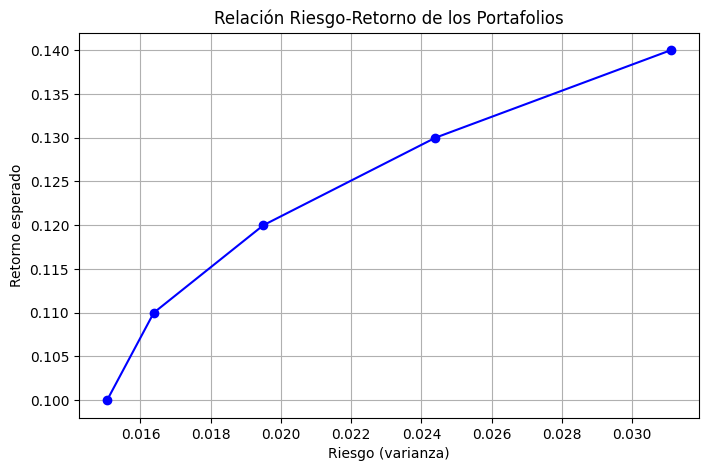

In [29]:
# Datos de la tabla
retornos = [0.10, 0.11, 0.12, 0.13, 0.14]
riesgos = [0.01505, 0.01638, 0.0195, 0.0244, 0.0311]

plt.figure(figsize=(8, 5))
plt.plot(riesgos, retornos, 'bo-')
plt.xlabel('Riesgo (varianza)')
plt.ylabel('Retorno esperado')
plt.title('Relación Riesgo-Retorno de los Portafolios')
plt.grid(True)
plt.show()

**Yo escogería el portafolio del 10%** pues tiene el mínimo riesgo(0.01505) con un retorno del 10%. Tiene una composición balanceada: 32% en fondo 1, 46% en fondo 2, y 22% en fondo 3, diversificando entre los tres fondos y considerando el análisis con el portafolio del $9%$ es el punto óptimo donde el riesgo comienza a aumentar con el retorno.

Por todas estas razones se vuelve un portafolio atractivo.


Portafolios con retornos más grandes como el del 12% tienen riesgos aún manejables que las personas también podrían aceptar, sin embargo la composición (los pesos) comienzan a desequilibrarse